# Beginner's Python—Session Two Biochemistry Questions

## **Colour and Conjugation**

In [1]:
#import some useful modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
from sklearn.metrics import r2_score

Materials appear to us as the colours that they reflect, meaning the remainng <span style="color:#FF200F">c</span><span style="color:#FF820F">o</span><span style="color:#FFC80F">l</span><span style="color:#A2F80F">o</span><span style="color:#4682E2">u</span><span style="color:#3B2FCE">r</span><span style="color:#FF0095">s</span> are absorbed by the material. Below is a diagram depicting the wavelength's of light (in metres) and their corresponding colours. A human eye can detect wavelengths of light between 380 to 740 nanometers, this range of wavelengths is classed as visible light.

<center><img src="./session_two_files/spectrum.png" width="450" align="center"/> 

<center><img src="./session_two_files/chlorophyll_structure.svg" width="200" align="center"/> 

Displayed above, is the molecule **chlorophyll** $\boldsymbol{a}$. It is an essential molecule for photosynthetic organisms, and drives photosynthesis by absorbing light, converting it into energy via electron transfer. Perhaps it is most well known for its characteristic <span style="color:#259B13">green</span> colour, which we see in plants, trees and grass. You may notice it is highly conjugated (contains alternating double bonds), this is key to its properties.

For more detail have a look at the wikipedia page: https://en.wikipedia.org/wiki/Conjugated_system#:~:text=Conjugated%20systems%20form%20the%20basis,or%20glow%20in%20the%20dark.

Below is a graph mimicking what you may expect to find when recording a UV-Vis spectrum of a coloured compound. On the x-axis is the wavelength of the light wave, and on the y-axis, the amount of that particaular wavelength the molecule has absorbed. 

e.g. Cholorophyll appers green to us, so it may only absorb red and blue light waves, reflecting green, what we see. 

**Run the code cell below.**

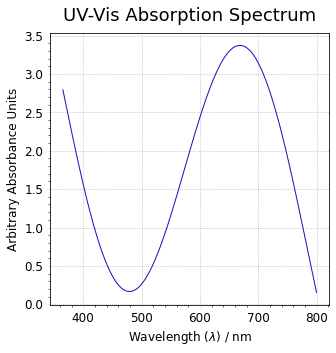

In [2]:
#Run this code
#Creating an array to input wavelength and absorbance values
wavelength = np.linspace(365,800,436)
absorbance = np.empty(436)
aa = len(absorbance)

#Defining a function to represent the spectrum
for i in range(aa):
    absorbance[i] = -np.cos((2*wavelength[i]-40)/280)+np.sin((2*wavelength[i]-40)/280)-(5/2)*np.cos((4*wavelength[i]-40)/280) - (1/2)*np.sin((4*wavelength[i]-40)/280) +1.8

#plotting graph
plt.figure(figsize=(5,5))
plt.xlabel('Wavelength ($\lambda$) / nm',fontsize=12) 
plt.ylabel('Arbitrary Absorbance Units',fontsize=12)
plt.title('UV-Vis Absorption Spectrum',pad=12, fontsize=18)
plt.grid(linestyle='dotted',c='0.7')
plt.plot(wavelength,absorbance,lw=1,c='#2909B9')
plt.tick_params(color='0.9',labelsize=12)
plt.minorticks_on()

 #### **Task 1**

The ${\lambda_{max}}$ value is often used to characterise the UV-Vis spectrum of compounds; It is the wavelength with the **highest absorbance value.**

**Using the `max()` function determine the highest value of the `absorbance` dataset (the y data for the graph above):**

**Run the code cell below.**

In [3]:
#Code to deduce the x-val using the maximum y-val, and printing the resulting y-value (the wavelength)
max_wav = wavelength[absorbance.argmax()]  
print("The wavelength is",max_wav, "nm")

The wavelength is 669.0 nm


**Using the equation  $E = \frac{hc}{\lambda}$ and the value calculated in the cell above, determine the energy of the ${\lambda_{max}}$  light wave absorbed in joules $(J)$.**

$ E = energy \\
h = Planck\ constant\ (6.626×10−34\ Js)  \\
c = speed \ of \ light \ (3 \times 10^{8}m \ s^{-1} ) \\
\lambda = wavelength \ (m)
$

**NOTE:** Don't forget units,  $1nm = 1 \times 10^{-9}m$. Input like this:  `1e-9`

## Using some real data to do the same thing...

**Please run the cell below.**

**NOTE:** Do not worry about the code below, we will only be using its output.

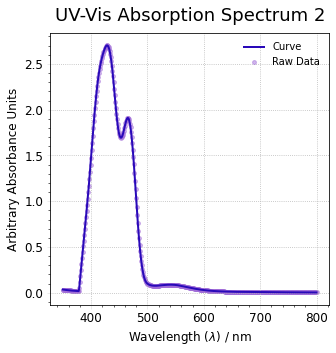

In [4]:
#Run this code
#Load the Spectrum data
url = 'https://raw.githubusercontent.com/warwickdatascience/beginners-python/master/session-two/subject_questions/session_two_files/uvvis_data.csv'
data = np.loadtxt(url, skiprows=1, delimiter=',')

#Label and isolate the raw data
#Take note of the list names, you will use them later
wavelength_2=data[:,0]
absorbance_2=data[:,1]

#Plot the data, trial fit, and formatting
plt.figure(figsize=(5,5))
plt.xlabel('Wavelength ($\lambda$) / nm',fontsize=12) 
plt.ylabel('Arbitrary Absorbance Units',fontsize=12)
plt.title('UV-Vis Absorption Spectrum 2',pad=12, fontsize=18)
plt.grid(linestyle='dotted',c='0.7')
plt.plot(wavelength_2,absorbance_2,lw=2,c='#2909B9',label='Curve')
plt.scatter(wavelength_2,absorbance_2,s=15,c='#A16DD8',alpha=0.5,label='Raw Data')
plt.tick_params(color='0.9',labelsize=12)
plt.legend(frameon=False,fontsize=10)
plt.minorticks_on()

plt.show()

 #### **Task 2**

The graph above is created using real data from a UV-Vis Spectrum. Below is some code to determine the `index` of the `absorbance_2` value which has the greatest absorbance, it's corresponding x-value will be the ${\lambda_{max}}$ for this dataset.

**Please run the cell below.**

In [5]:
#Run this cell, it will print the index of the dataset value contining the highest absorbance
result = np.where(absorbance_2 == np.amax(absorbance_2))
print(result[0])

[372]


**Using the above result, print the value of `wavelength_2[]` at that specific index. This is the ${\lambda_{max}}$.**

**BONUS: Create a mini program using  `input()` that automatically calculates wavelength for a wave of any user-chosen energy by rearranging $E = \frac{hc}{\lambda}$. Use it to calculate the wavelength of a lightwave with energy `3.5e-19`$(J)$.**

$ E = energy \\
h = Planck\ constant\ (6.626×10−34\ Js)  \\
c = speed \ of \ light \ (3 \times 10^{8}m \ s^{-1} ) \\
\lambda = wavelength \ (m)
$

**NOTE:** Be careful with what type of input you allow, remember you can specify the `type()` using `float()`, `str()`, or `int()`. And don't forget units!

### Predicting the colours of dyes

 #### **Task 3**

Below are some conjugated compounds commonly known as dyes. The energy of the ${\lambda_{max}}$ light wave is displayed underneath each one.

<center><img src="./session_two_files/dyes.png" width="800" align="center"/> 

Using the program you created above, calculate the ${\lambda_{max}}$ in nm for each compund. Do all calculations in m then divide results by `1e-9` to get answers in nm.

**TIP:** You can compile multiple inputs in one run. Don't forget units! Use `round()` to keep answers clean.

**What might be the colours of these compounds?**

You can use these wavelengths to predict the colours the compounds will appear as. Use the ranges in the table below, and assign each wavelength to a colour. Remember, this is the colour they absorb the most. To get an indication of what colour they appear as, find the complementary colour (oppposite colour on the colour wheel) to the one you just identified. Double click the cell below to edit in your answers.

**Quinacridone colour absorbed:** 

**Quinacridone's colour:** 


**Copper (II) Phtalocyanine colour absorbed:** 

**Copper (II) Phtalocyanine's colour:** 


**Indigo colour absorbed:** 

**Indigo's colour:**

Wavelengths of light and their colours: [**Violet:** *380nm-450nm*], [**Blue:** *450nm-485nm*], [**Cyan:** *485nm-500nm*], [**Green:** *500nm-565nm*], [**Yellow:** *565nm-590nm*], [**Orange:** *590nm-625nm*], [**Red:** *625nm-740nm*]

<center><img src="./session_two_files/colour_wheel2.png" width="200" align="center"/>

## **Michaelis–Menten kinetics**

The Michaelis–Menten model is one of the best models for enzyme kinetics, it allows for enzymes to be classified by their $K_{M}$ values, and makes it possible to measure an enzyme's rate of reaction with greater accuracy. The equation for the rate of formation of product $[P]$ is shown below.

$$rate =    \frac{d[P]}{dt}  = \frac{V_{max}[S]}{K_{M}+[S]} $$

If you want to find out more about Michaelis-Menten kinetics head over to https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics

Data from experiments produces a non-linear graph for the enzyme's rate, therefore non-linear regression must be applied to fit a curve to the data.

**Please run the cell below.**

**NOTE:** Do not worry about the code below, we will only be using its output.

Fitted Constants:- 
KM: 29.710582955127755 
Vmax: 0.7972991564434925


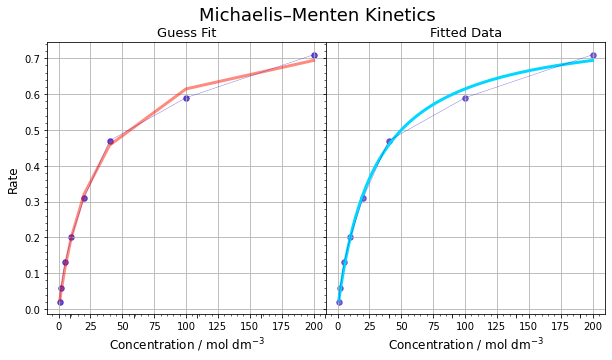

In [6]:
#Run this cell (Shift+Enter)
#import a useful fitting package
from scipy.optimize import curve_fit

#Label and isolate the raw data
conc = np.array([1.00,2.00,5.00,10.00, 20.00, 40.00, 100.00, 200.00])
rate = np.array([0.02,0.06,0.13,0.2,0.31,0.47,0.59,0.71])

#Michaelis-Menten Kinetics equation inputted as a function
def rate_opt(c, km, vmax):
    return (c*vmax)/(km+c)

#make guesses for constants
g = [30,0.9]
n = len(conc)
y = np.empty(n)
for i in range(n):
    y[i] = rate_opt(conc[i], g[0], g[1])
    
#Run function through curve_fit operation (non-linear regression)
k,cov = curve_fit(rate_opt,conc,rate, g)
print("Fitted Constants:-","\nKM:", k[0], "\nVmax:", k[1])
#use calculated constants for an improved fit
y = np.empty(n)
for i in range(n):
    y[i] = rate_opt(conc[i], k[0], k[1])
    
#Michaelis-Menten Kinetics equation inputted as a function    
def rate_smooth(s,km,vmax):
    return (s*vmax)/(km+s)

#create a new array using a larger number of inputs and the optimised constants for a smooth line output
base = np.linspace(1, 200, 400)
fitted = np.empty(400)
fitted_len = len(fitted)
for i in range(fitted_len):
    fitted[i] = rate_smooth(base[i],k[0],k[1])

#plot the figure   
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5),sharey=True,gridspec_kw={'wspace': 0})
fig.suptitle('Michaelis–Menten Kinetics',fontsize=18)

#Create the gridlines
ax3 = fig.add_subplot(111, zorder=-1)
for _, spine in ax3.spines.items():
    spine.set_visible(False)
ax3.tick_params(labelleft=False, labelbottom=False, left=False, right=False )
ax3.get_shared_x_axes().join(ax3,ax1)
ax3.grid(axis="x")
ax1.grid()
ax2.grid()

#Plot Raw Data
ax1.set_title('Guess Fit',fontsize=13)
ax1.plot(conc,y,c='#FF1800',lw=3,alpha=0.5)
ax1.plot(conc,rate,lw=0.25,c='#2909B9',label='"Raw Data"')
ax1.scatter(conc,rate,s=30,c='#2909B9',alpha=0.7,label='Raw Data')
ax1.set_xlabel('Concentration / mol dm$^{-3}$',fontsize=12)
ax1.set_ylabel('Rate',fontsize=12)
ax1.minorticks_on()

#Plot Fitted Data
ax2.plot(base,fitted,lw=3,c='#02D7FF',label='"Test"')
ax2.plot(conc,rate,lw=0.25,c='#2909B9',label='"Raw Data"')
ax2.scatter(conc,rate,s=30,c='#2909B9',alpha=0.6,label='Raw Data')
ax2.set_title('Fitted Data',fontsize=13)
ax2.set_xlabel('Concentration / mol dm$^{-3}$',fontsize=12)
ax2.minorticks_on()

In [7]:
#Run this to see the R squared value for the fitted data
print("R squared: ", r2_score(rate,y))

R squared:  0.9967217459700304


**Left:** A graph showing the raw data in violet and a line of best fit (red) produced using estimated values of the constants $K_{M}$ and $V_{max}$.

**Right:** A graph showing the raw data in violet and a line of best fit (turquoise) produced using optimised values of the constants $K_{M}$ and $V_{max}$, resolved using non-linear regression.

 ### **Task 4**

**Using the `max()` function determine the highest rate measured in the `rate` dataset and the highest predicted value in the `fitted` dataset. Use `round()` to give answers to an apporapriate number of decimal places.**

**Below is a list containing the $K_{M}$ for a number of commonm enzymes. Use `sum()` and `len()` to find and print the average $K_{M}$, and also give the value of the lowest $K_{M}$ using `min()`.**

In [8]:
#List containing the Km's for ome common enzymes
enzyme_km = [5000, 6, 4000, 5000, 8000, 50, 50, 400, 1000, 60, 3, 0.4, 300]

#Finding average and printing along with minimum Km


### **Bonus Task**

**At how many concentrations does the `rate` dataset exceed a rate of 0.4?**

**TIP:** Print `result_2` to see what kind of output you are dealing with, how can you manipulate it to print nicely? You can also use `type()`.

In [9]:
#The line of code below creates a result containing all the indexes which contain rate values > 0.4
#Formulate a print argument which returns the number of indexes
result_2 = np.where(rate > 0.4)
